# ToyBrain dataset tutorial:
# How to generate a ToyBrain dataset with a desired `image <--> covariates` relationship ?

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages
import os, sys
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
from sklearn import datasets, linear_model
from tqdm.notebook import tqdm
import random
import math
import json

from create_toybrains import ToyBrainsData
from utils.vizutils import *

## (Step 1) Create a configuration file
that contains, <br>
(a) the list of covariates and labels <br>
(b) the relationship between each covaraite and the image generation attributes <br><br>
The config can be stored in `configs/` folder as shown below:

In [3]:
! head -30 configs/base.py

head: cannot open 'configs/base.py' for reading: No such file or directory


### Check the configuration

In [4]:
toy = ToyBrainsData(base_config='configs.lbl5cov3_base.py')

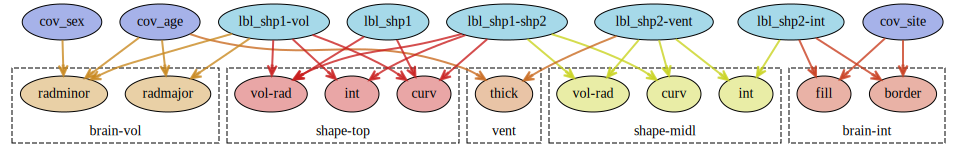

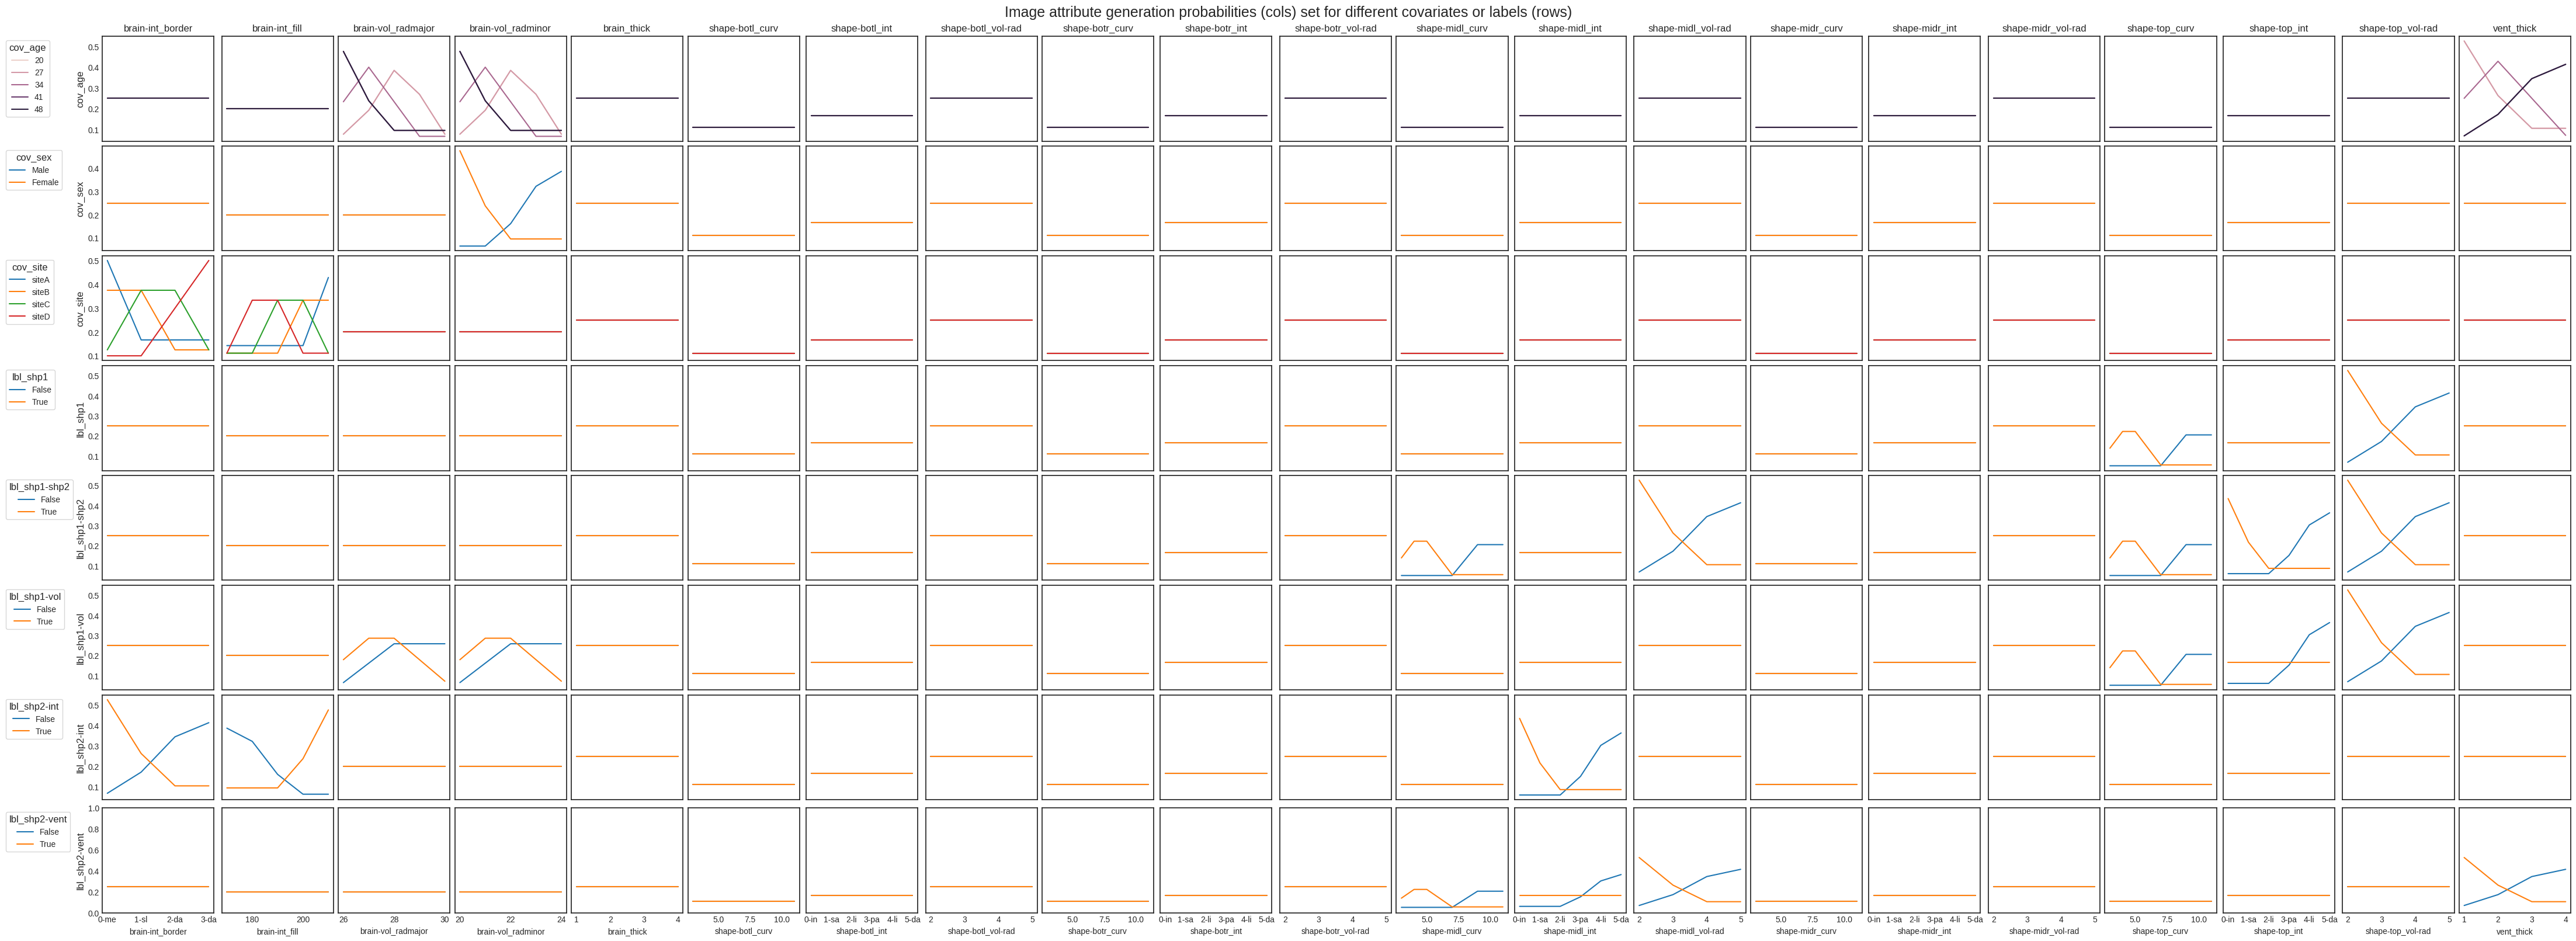

In [14]:
_ = toy.show_current_config() # also returns the nodes and connections of the causal graph

We can also add tweaks to a base config and check how this changes the relationships and probability distributions:

In [5]:
# add a tweaking config "lbl5cov3_tweak_highprobas.py" that will make the probability distributions 
# extremely distinct for all covariates AND it also creates a link between cov_site and shape-midl_int
toy_highprobas = ToyBrainsData(base_config='configs.lbl5cov3_base', 
                               tweak_config='configs.lbl5cov3_tweak_highprobas')

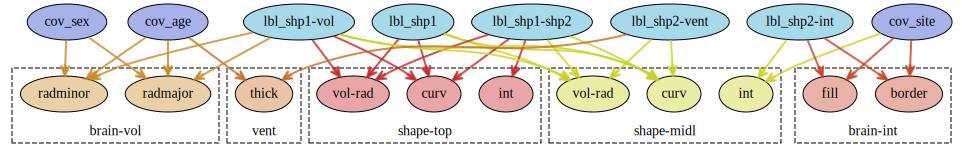

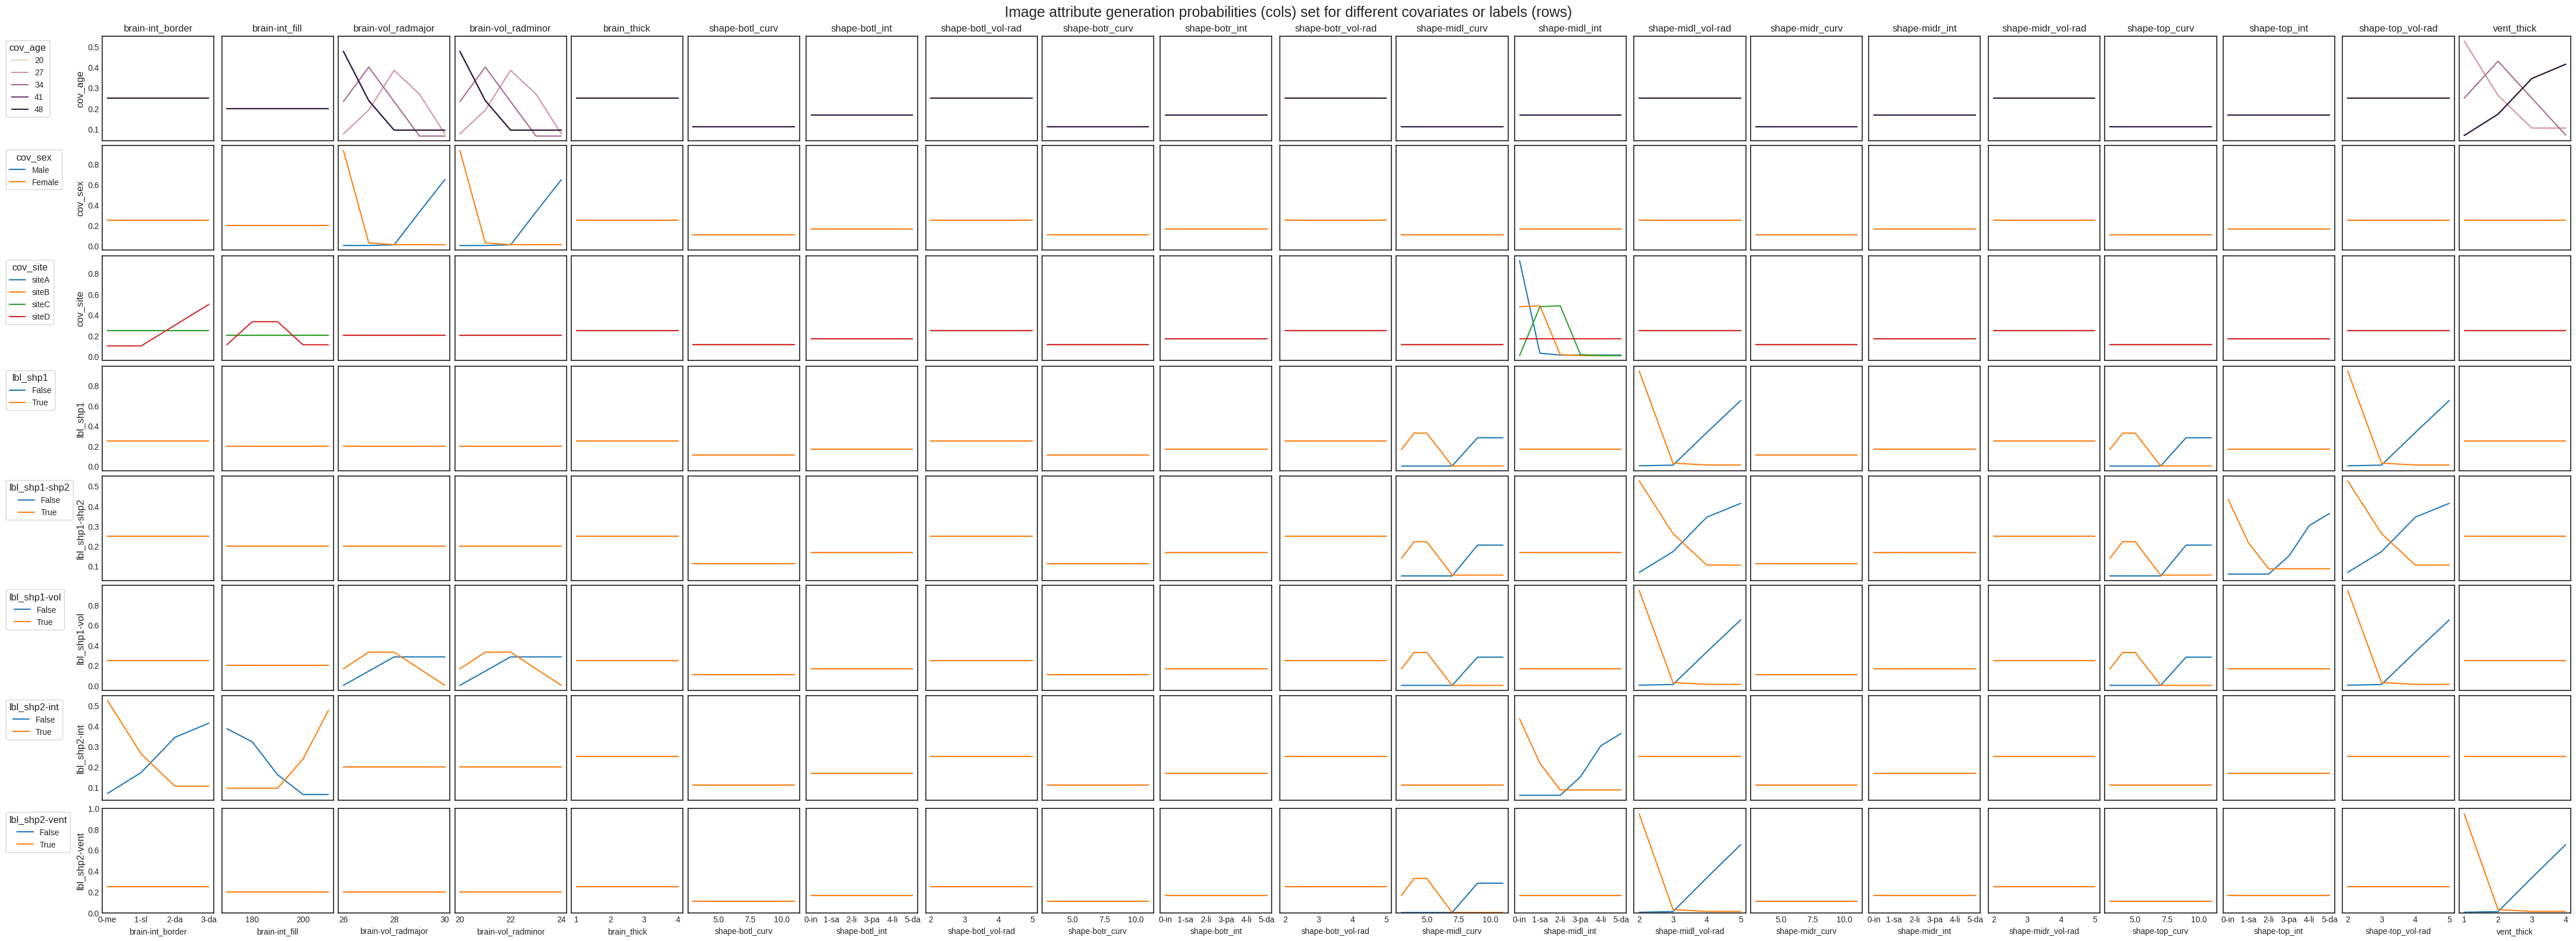

In [15]:

_ = toy_highprobas.show_current_config()

## (Step 2) Generate data table 
Sample the dataset and verify how the distributions will look. 
If some distribution isn't as expected then go back to step 1 and edit the config file accordingly.

In [6]:
df = toy.generate_dataset_table(n_samples=1000)

Generating 1000 synthetic toy brain images:


100%|██████████| 1000/1000 [00:21<00:00, 47.49it/s]


### Visualize the dataframe dist.

In [7]:
df

gen_brain-vol_radminor  gen_brain-vol_radmajor  gen_brain_thick  \
subjectID                                                                    
00000                        22.0                    29.0              2.0   
00001                        22.0                    28.0              2.0   
00002                        20.0                    28.0              3.0   
00003                        21.0                    27.0              4.0   
00004                        24.0                    28.0              1.0   
...                           ...                     ...              ...   
00995                        23.0                    27.0              3.0   
00996                        22.0                    26.0              1.0   
00997                        23.0                    28.0              2.0   
00998                        20.0                    27.0              3.0   
00999                        23.0                    27.0              3.0   

           gen_brain-int_fill gen_brain-int_border  gen_vent_thick  \
subjectID                                                            
00000                   190.0      2-darkslateblue             1.0   
00001                   170.0          1-slateblue             4.0   
00002                   180.0           3-darkblue             1.0   
00003                   170.0      2-darkslateblue             4.0   
00004                   210.0    0-mediumslateblue             4.0   
...                       ...                  ...             ...   
00995                   180.0           3-darkblue             1.0   
00996                   190.0          1-slateblue             1.0   
00997                   170.0          1-slateblue             2.0   
00998                   210.0      2-darkslateblue             1.0   
00999                   210.0    0-mediumslateblue             3.0   

           gen_shape-top_curv gen_shape-top_int  _gen_shape-top_vol-rad  \
subjectID                                                                 
00000                     6.0       0-indianred                     2.0   
00001                     9.0      4-lightgreen                     2.0   
00002                    11.0      4-lightgreen                     4.0   
00003                     6.0      4-lightgreen                     2.0   
00004                    10.0       5-darkgreen                     4.0   
...                       ...               ...                     ...   
00995                     6.0       0-indianred                     2.0   
00996                    11.0      4-lightgreen                     5.0   
00997                    10.0       0-indianred                     4.0   
00998                     3.0       5-darkgreen                     2.0   
00999                    10.0       5-darkgreen                     5.0   

           gen_shape-midr_curv  ... lbl_shp1-shp2  lbl_shp1-vol  \
subjectID                       ...                               
00000                      6.0  ...          True          True   
00001                      9.0  ...         False          True   
00002                      6.0  ...          True         False   
00003                      6.0  ...         False          True   
00004                     10.0  ...         False         False   
...                        ...  ...           ...           ...   
00995                      7.0  ...          True          True   
00996                     10.0  ...          True          True   
00997                      3.0  ...          True         False   
00998                      9.0  ...          True          True   
00999                     11.0  ...         False         False   

           lbl_shp2-vent lbl_shp2-int  gen_brain-vol  gen_shape-top_vol  \
subjectID                                                                 
00000               True        False    2004.336113          12.000000   
00001       

#### (a) Viz image attributes dist.

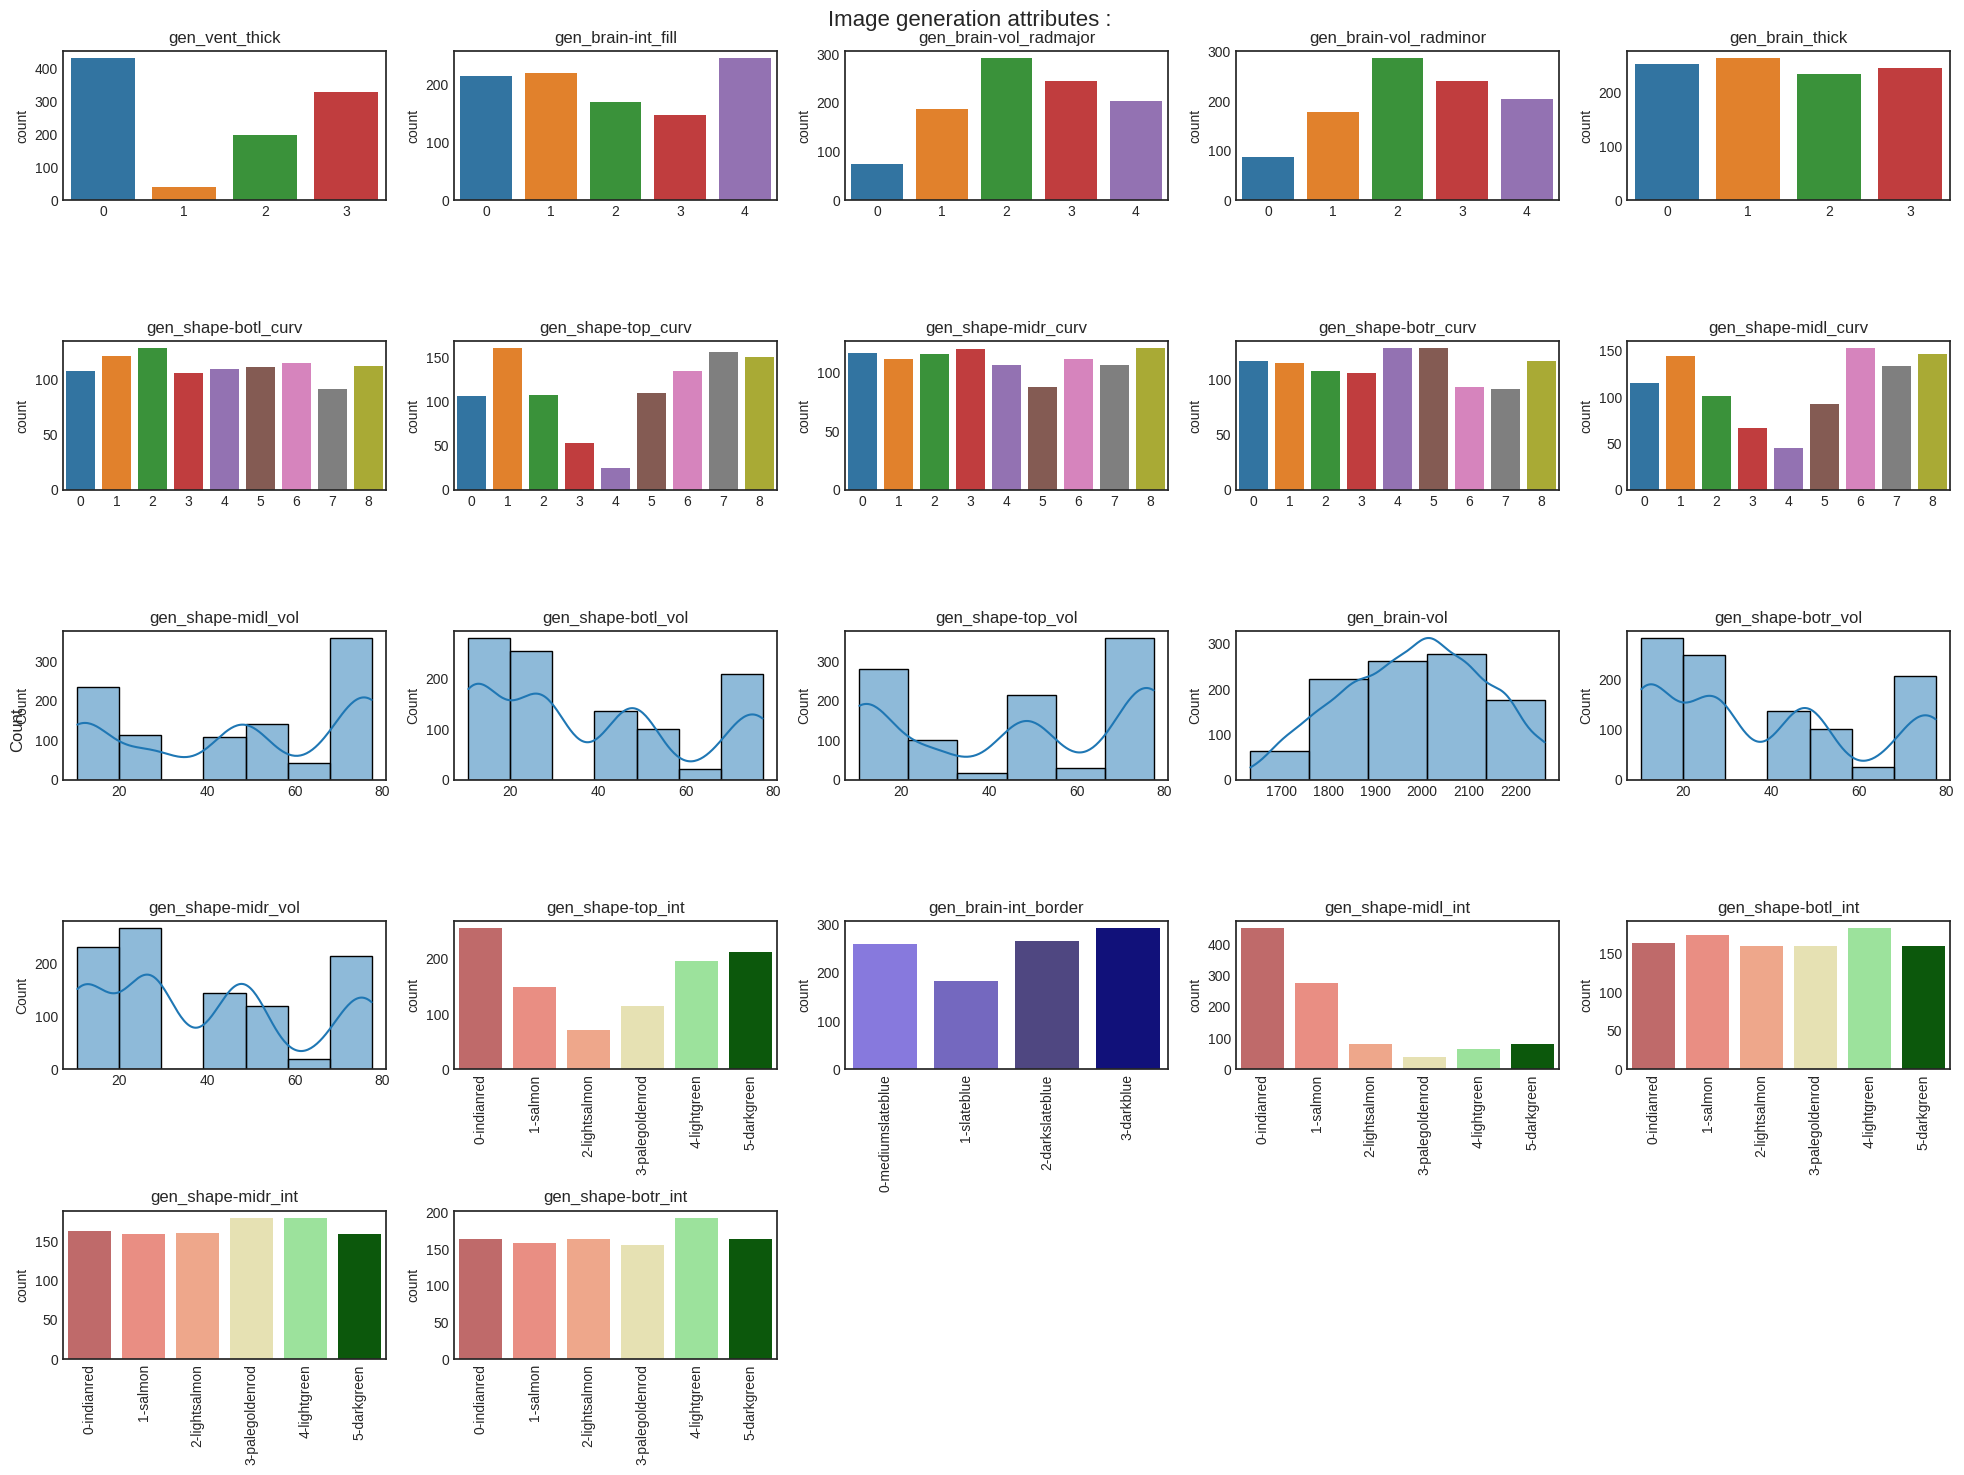

In [16]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^gen_'), title="Image generation attributes :")
plt.show()

#### (b) Viz lbl dist.

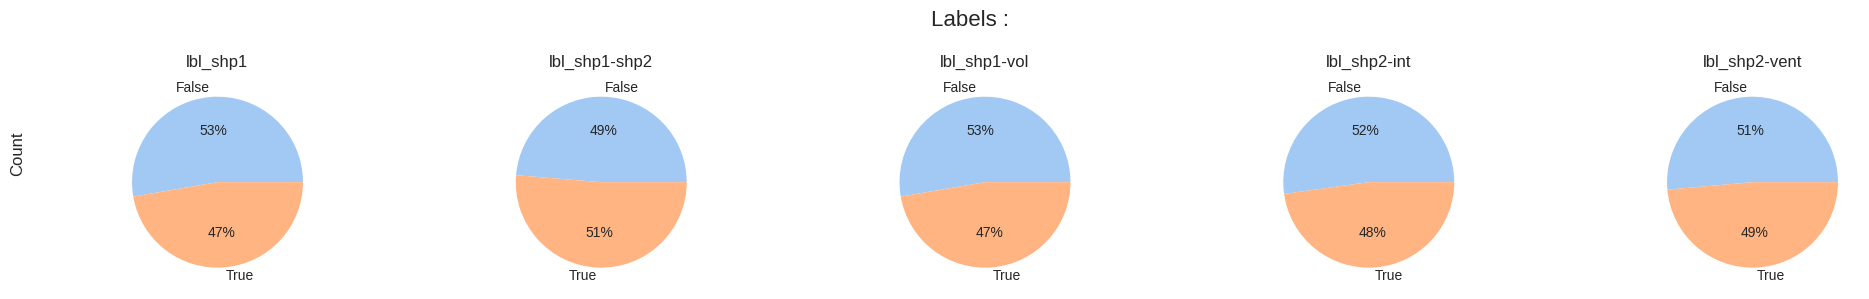

In [17]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^lbl'), title="Labels :")
plt.show()

#### (c) Viz other covariates dist.

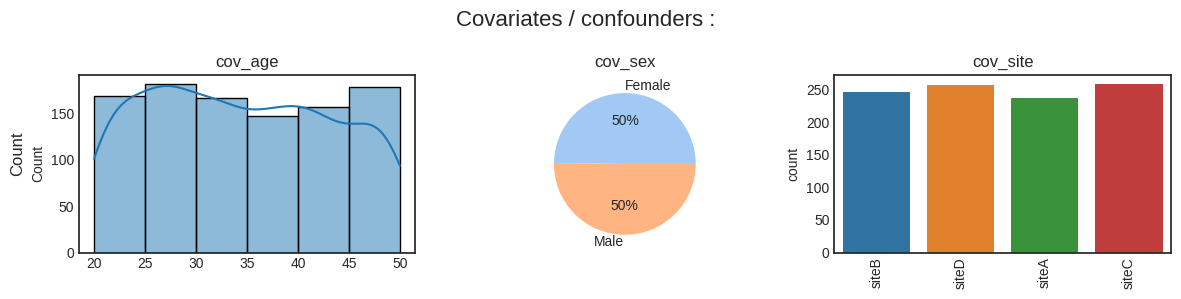

In [18]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^cov_'), title="Covariates / confounders :")
plt.show()

#### (d) Viz image attributes vs covariates dist.

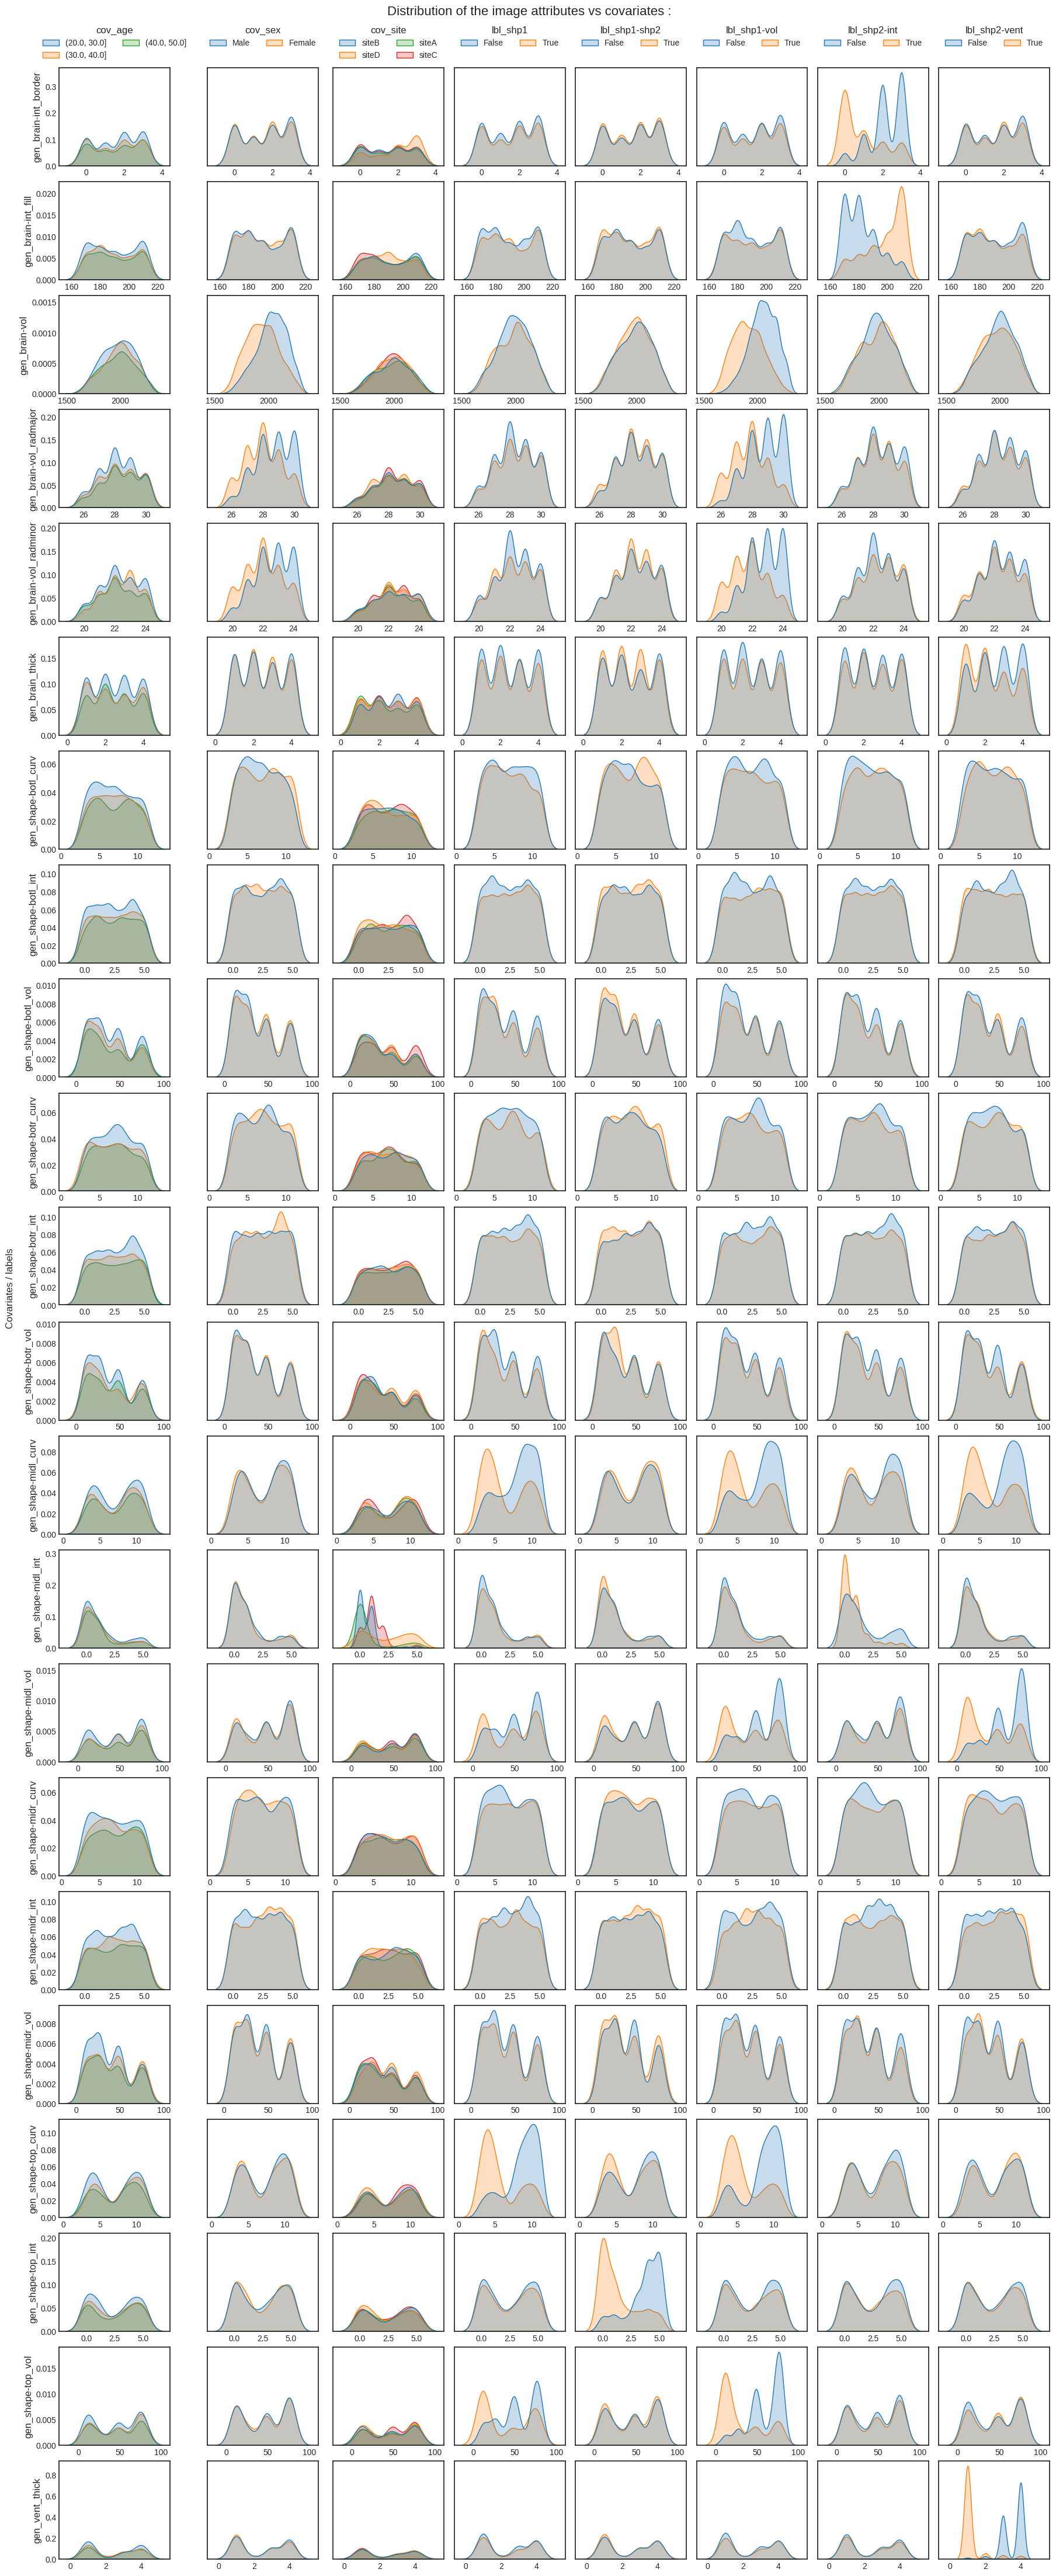

In [19]:
# get all column names starting with 'gen_'
plot_col_dists(df, attr_cols=df.filter(regex='^gen_').columns, cov_cols=df.filter(regex='^(cov_|lbl)').columns, 
               title="Distribution of the image attributes vs covariates :")
plt.show()

Compare with the tweaked setting

In [21]:
df_highprobas = toy_highprobas.generate_dataset_table(n_samples=1000)

Generating 1000 synthetic toy brain images:


100%|██████████| 1000/1000 [00:22<00:00, 45.30it/s]


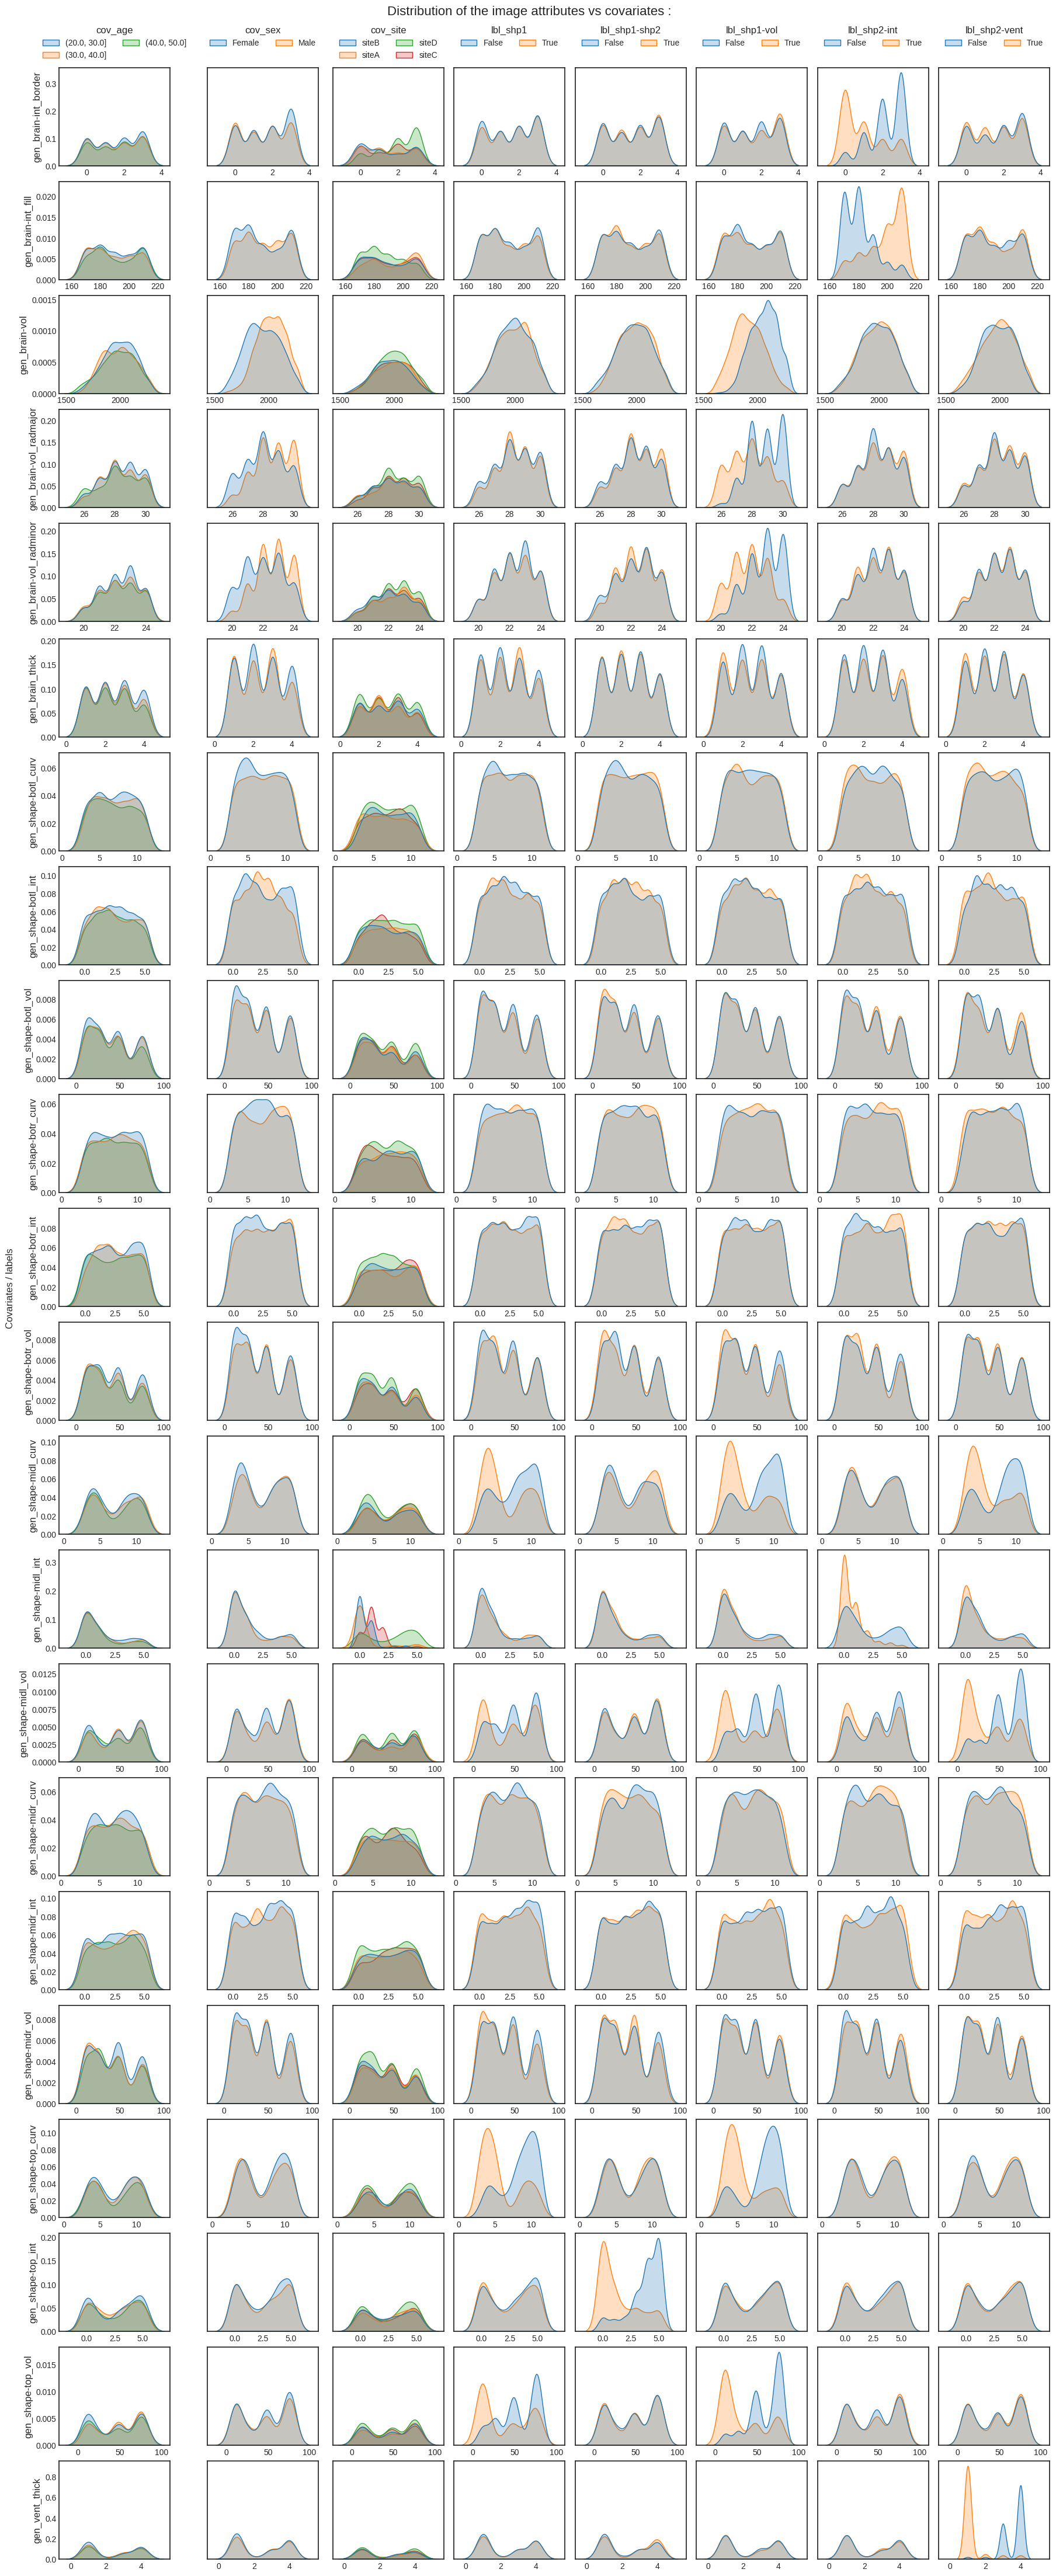

In [22]:
plot_col_dists(df_highprobas, 
               attr_cols=df_highprobas.filter(regex='^gen_').columns, 
               cov_cols=df_highprobas.filter(regex='^(cov_|lbl)').columns, 
               title="Distribution of the image attributes vs covariates :")
plt.show()

### (Step 3) Generate images

In [ ]:
toy.generate_dataset() #TODO

Alternatively, the dataset can be generated from python file directly as follows. This executes both (step 2) and (step 3)

In [28]:
# generating 100 samples with debug switch turned on
! python create_toybrains.py -d -n 100 -c configs.lbl5cov3_base

Generative parameter        |        States 
------------------------------------------------------------
brain-vol_radminor         [20 21 22 23 24]
brain-vol_radmajor         [26 27 28 29 30]
brain_thick                [1 2 3 4]
brain-int_fill             [210 200 190 180 170]
brain-int_border           ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']
vent_thick                 [1 2 3 4]
shape-top_curv             [ 3  4  5  6  7  8  9 10 11]
shape-top_int              ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-top_vol-rad          [2 3 4 5]
shape-midr_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midr_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-midr_vol-rad         [2 3 4 5]
shape-midl_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midl_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkg

In [17]:
DATA_DIR = "toybrains30k" #"toybrains10k"
df = pd.read_csv(glob(f"dataset/{DATA_DIR}/toybrains_n*.csv")[0]).set_index('subjectID')

In [18]:
# sort dataframe cols by column name
df = df.reindex(sorted(df.columns), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _gen_brain_vol-radmajor  30000 non-null  float64
 1   _gen_brain_vol-radminor  30000 non-null  float64
 2   _gen_shape-botl_vol-rad  30000 non-null  float64
 3   _gen_shape-botr_vol-rad  30000 non-null  float64
 4   _gen_shape-midl_vol-rad  30000 non-null  float64
 5   _gen_shape-midr_vol-rad  30000 non-null  float64
 6   _gen_shape-top_vol-rad   30000 non-null  float64
 7   cov_age                  30000 non-null  float64
 8   cov_sex                  30000 non-null  object 
 9   cov_site                 30000 non-null  object 
 10  gen_border_int           30000 non-null  object 
 11  gen_brain_int            30000 non-null  float64
 12  gen_brain_thick          30000 non-null  float64
 13  gen_brain_vol            30000 non-null  float64
 14  gen_shape-botl_curv   

### (1) 2D Images

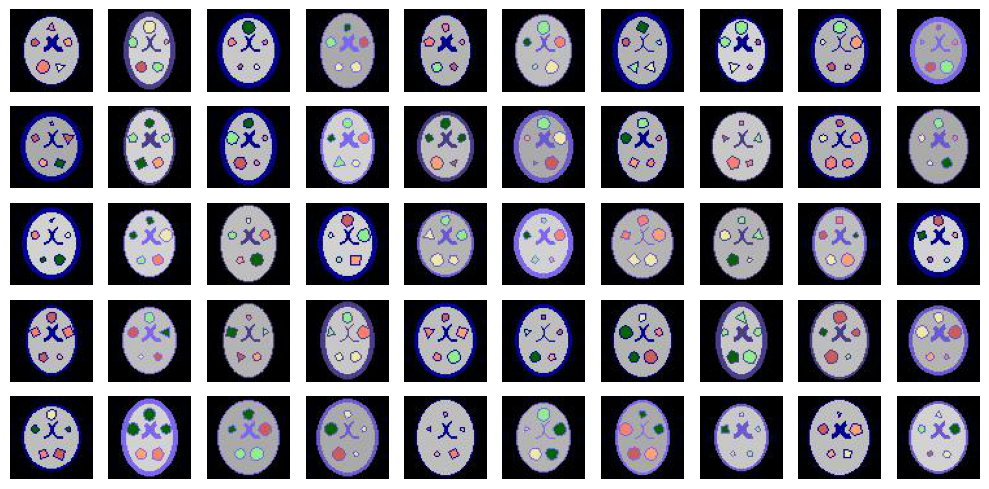

In [19]:
img_files = sorted(glob(f"dataset/{DATA_DIR}/images/*.jpg"))
show_images(img_files=img_files, n_rows=5)

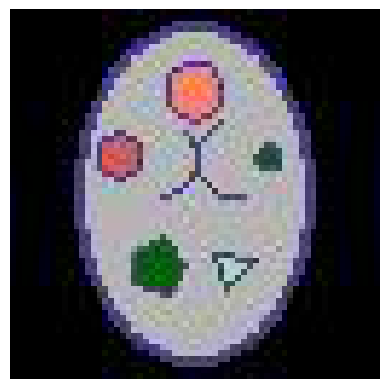

In [30]:
# one random image
img_file = np.random.choice(img_files)
img = mpimg.imread(img_file)
f = plt.figure(frameon=False)
plt.imshow(img)
plt.axis('off')
# plt.savefig("docs/brain.png", bbox_inches='tight')
plt.show()

## Baseline predictive models

## Misl / ReadMe figures

##### Image attributes plot for the ReadMe

In [23]:
# plt.rcParams['axes.facecolor']='black'
# plt.rcParams['savefig.facecolor']='black'
# fs = 12
# atrs = sorted([col for col in df.filter(regex='^gen_').columns if 'shape' not in col])
# # drop all shapes except one to show
# atrs_shape = [col for col in df.filter(regex='^gen_').columns if ('botr' in col)]
# atrs = atrs + atrs_shape
# # f, axes = plt.subplots(len(atrs), 1, figsize=(7,1.3*len(atrs)), constrained_layout=True)
# f = plt.figure(constrained_layout=True, figsize=(7,1.3*len(atrs)))
# f.suptitle(f"Modifying different image attributes:", 
#            fontsize=fs+2, ha='right', x=0.1, fontweight='heavy')
# # define each subplots row as a subfigure and set separate subtitles
# subfigs = f.subfigures(len(atrs), 1)

# for i, subfig in enumerate(subfigs):
    
#     atr = atrs[i]
#     atr_vals = df[atr].sort_values().unique()
#     if len(atr_vals)>7: # if more than 7 then sample the least best and some values in between
#         atr_vals = [atr_vals[0]] + np.sort(np.random.choice(atr_vals[1:-2], 7-2)).tolist() + [atr_vals[-1]]
#     # print(atr)
#     # color = 'darkred' if 'brain' in atr else ('darkgreen' if 'shape' in atr else 'darkblue')
#     subfig.suptitle(atr.replace('gen_',''), 
#                     fontsize=fs, color='r', ha='right', x=0.12, fontweight='heavy')
#     axes_row = subfig.subplots(nrows=1, ncols=7)
    
#     # organize the attribute sorting order so that  the images are similar to each other within each row
#     col_order = atrs[:]
#     related_atrs = [col for col in col_order if (atr.split('_')[1] in col) and (col!=atr)]
#     col_order = [atr] + related_atrs + [c for c in col_order if c not in (related_atrs + [atrs])]
#     df_sorted = df.sort_values(by=col_order, axis=0)
    
#     for j, ax in enumerate(axes_row):
#         if j<len(atr_vals):
#             atr_val = atr_vals[j]
#             sample = df_sorted.loc[df_sorted[atr]==atr_val].iloc[0]
#             subID = f"{sample.name:05}"
#             # print(subID) 
#             img = mpimg.imread(f"toybrains/images/{subID}.jpg")
#             ax.imshow(img)
#             if isinstance(atr_val, float): atr_val = int(atr_val)
#             if isinstance(atr_val, str): atr_val = atr_val.split('-')[1]
#             ax.set_title(f"= {atr_val}", fontsize=fs-4, ha='center')
        
#         ax.axis("off")

# # plt.savefig("docs/image_attrs.png", bbox_inches='tight')
# plt.show()

In [50]:
# plt.rcParams['axes.facecolor']='black'
# plt.rcParams['savefig.facecolor']='black'
# fs = 12

# atrs = sorted([col for col in df.filter(regex='^cov_').columns])
# # f, axes = plt.subplots(len(atrs), 1, figsize=(7,1.3*len(atrs)), constrained_layout=True)
# f = plt.figure(constrained_layout=True, figsize=(7,1.3*len(atrs)))
# # f.suptitle(f"Modifying different image attributes:", 
# #            fontsize=fs+2, ha='right', x=0.1, fontweight='heavy')
# # define each subplots row as a subfigure and set separate subtitles
# subfigs = f.subfigures(len(atrs), 1)

# for i, subfig in enumerate(subfigs):
    
#     atr = atrs[i]
#     atr_vals = df[atr].sort_values().unique()
#     if len(atr_vals)>7: # if more than 7 then sample the least best and some values in between
#         atr_vals = [atr_vals[0]] + np.sort(np.random.choice(atr_vals[1:-2], 7-2)).tolist() + [atr_vals[-1]]
#     # print(atr)
#     # color = 'darkred' if 'brain' in atr else ('darkgreen' if 'shape' in atr else 'darkblue')
#     subfig.suptitle(atr.replace('gen_',''), 
#                     fontsize=fs, color='blue', ha='right', x=0.12, fontweight='heavy')
#     axes_row = subfig.subplots(nrows=1, ncols=7)
    
#     # organize the attribute sorting order so that  the images are similar to each other within each row
#     col_order = atrs[:]
#     related_atrs = [col for col in col_order if (atr.split('_')[1] in col) and (col!=atr)]
#     col_order = [atr] + related_atrs + [c for c in col_order if c not in (related_atrs + [atrs])]
#     df_sorted = df.sort_values(by=col_order, axis=0)
    
#     for j, ax in enumerate(axes_row):
#         if j<len(atr_vals):
#             atr_val = atr_vals[j]
#             sample = df_sorted.loc[df_sorted[atr]==atr_val].iloc[0]
#             subID = f"{sample.name:05}"
#             # print(subID) 
#             img = mpimg.imread(f"toybrains/images/{subID}.jpg")
#             ax.imshow(img)
#             if isinstance(atr_val, float): atr_val = int(atr_val)
#             if isinstance(atr_val, str): atr_val = atr_val.split('-')[1]
#             ax.set_title(f"= {atr_val}", fontsize=fs-4, ha='center')
        
#         ax.axis("off")

# # plt.savefig("docs/image_attrs.png", bbox_inches='tight')
# plt.show()